<a href="https://colab.research.google.com/github/venkateshblks/DataScience-practice/blob/main/simple%26multi-linear-regression/Multi_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import numpy as np
from statsmodels.graphics.regressionplots import influence_plot
import matplotlib.pyplot as plt


In [2]:
cars=pd.read_csv('Cars.csv')
cars.head()

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149


In [3]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   HP      81 non-null     int64  
 1   MPG     81 non-null     float64
 2   VOL     81 non-null     int64  
 3   SP      81 non-null     float64
 4   WT      81 non-null     float64
dtypes: float64(3), int64(2)
memory usage: 3.3 KB


In [4]:
cars.isna().sum()

HP     0
MPG    0
VOL    0
SP     0
WT     0
dtype: int64

In [5]:
cars.corr()

,HP,MPG,VOL,SP,WT
HP,1.000000,-0.725038,0.077459,0.973848,0.076513
MPG,-0.725038,1.000000,-0.529057,-0.687125,-0.526759
VOL,0.077459,-0.529057,1.000000,0.102170,0.999203
SP,0.973848,-0.687125,0.102170,1.000000,0.102439
WT,0.076513,-0.526759,0.999203,0.102439,1.000000


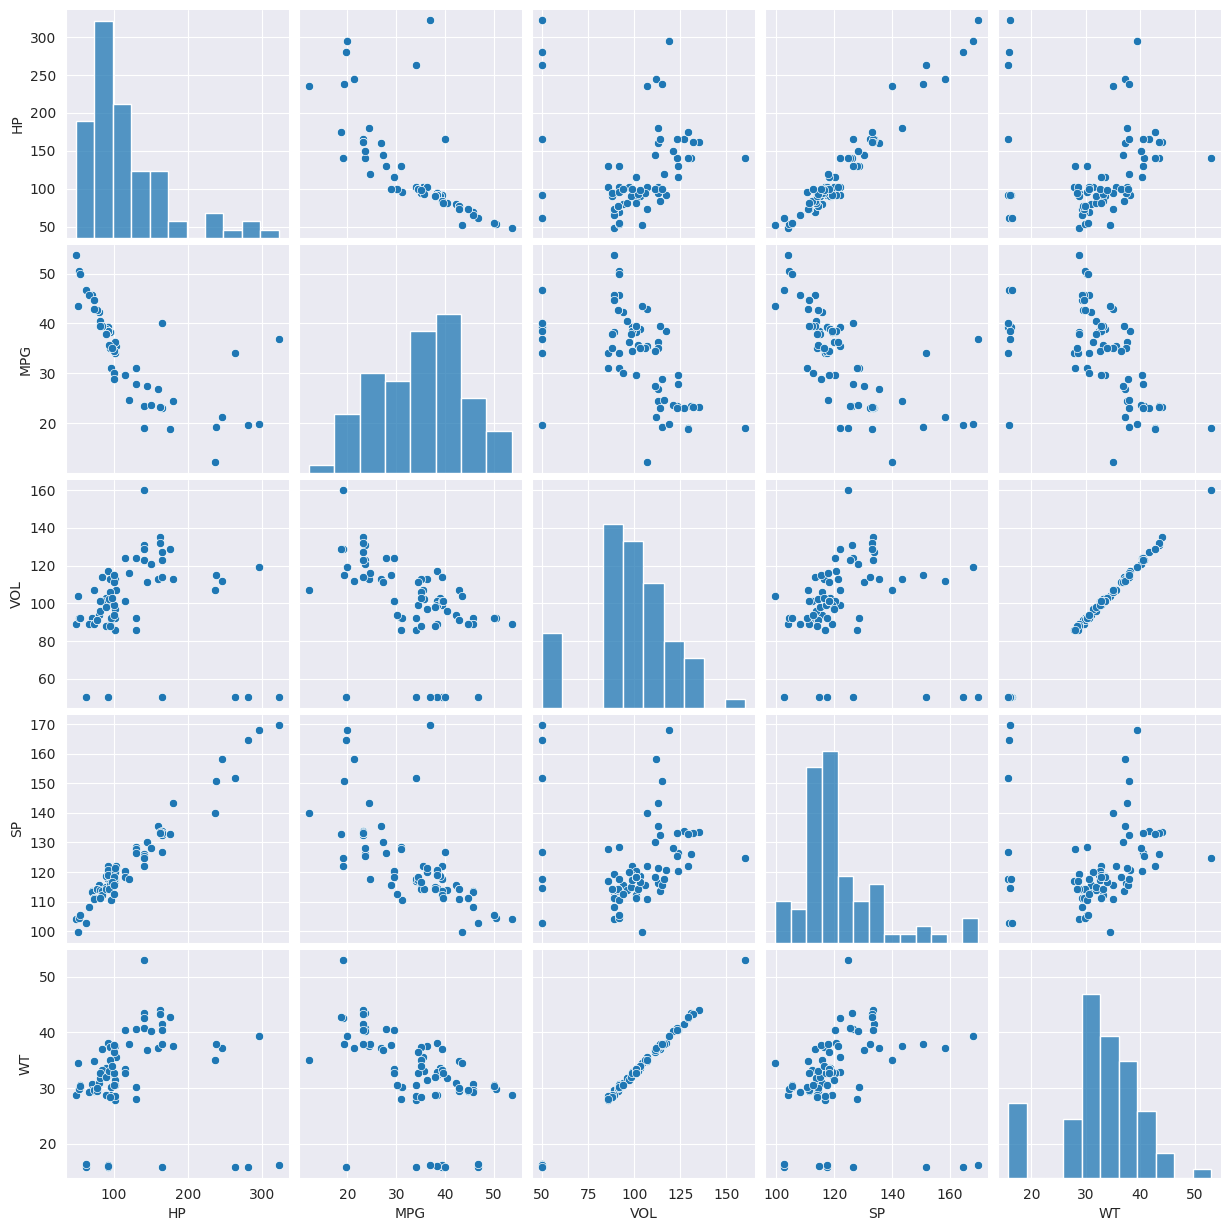

In [6]:
sns.set_style(style='darkgrid')
sns.pairplot(cars)

# preparing a model

In [7]:
import statsmodels.formula.api as smf
model=smf.ols('MPG~WT+VOL+SP+HP',data=cars).fit()

In [8]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     63.80
Date:                Fri, 01 Mar 2024   Prob (F-statistic):           1.54e-23
Time:                        14:41:52   Log-Likelihood:                -233.96
No. Observations:                  81   AIC:                             477.9
Df Residuals:                      76   BIC:                             489.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     30.6773     14.900      2.059      0.043       1.001      60.354
WT             0.4006      1.693      0.237      0.814      -2.972       3.773
VOL           -0.3361      0.569     -0.591      0.556      -1.469       0.796
SP             0.3956      0.158      2.500      0.015       0.080       0.711
HP            -0.2054      0.039     -5.239      0.000      -0.284      -0.127
==============================================================================
Omnibus:                       10.780   Durbin-Watson:                   1.403
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               11.722
Skew:                           0.707   Prob(JB):                      0.00285
Kurtosis:                       4.215   Cond. No.                     6.09e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## simple linear regression models

In [9]:
m_v=smf.ols("MPG~VOL",data=cars).fit()
print(m_v.tvalues,'\n',m_v.pvalues)

Intercept    14.106056
VOL          -5.541400
dtype: float64 
 Intercept    2.753815e-23
VOL          3.822819e-07
dtype: float64


In [10]:
m_w=smf.ols("MPG~WT",data=cars).fit()
print(m_w.tvalues,'\n',m_w.pvalues)

Intercept    14.248923
WT           -5.508067
dtype: float64 
 Intercept    1.550788e-23
WT           4.383467e-07
dtype: float64


In [11]:
m_wv=smf.ols("MPG~WT+VOL",data=cars).fit()
print(m_wv.tvalues,'\n',m_wv.pvalues)
m_wv.summary()

Intercept    12.545736
WT            0.489876
VOL          -0.709604
dtype: float64 
 Intercept    2.141975e-20
WT           6.255966e-01
VOL          4.800657e-01
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.282
Model:                            OLS   Adj. R-squared:                  0.264
Method:                 Least Squares   F-statistic:                     15.33
Date:                Fri, 01 Mar 2024   Prob (F-statistic):           2.43e-06
Time:                        14:41:52   Log-Likelihood:                -280.16
No. Observations:                  81   AIC:                             566.3
Df Residuals:                      78   BIC:                             573.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     56.8847      4.534     12.546      0.000      47.858      65.912
WT             1.4349      2.929      0.490      0.626      -4.397       7.266
VOL           -0.6983      0.984     -0.710      0.480      -2.658       1.261
==============================================================================
Omnibus:                        2.405   Durbin-Watson:                   0.591
Prob(Omnibus):                  0.300   Jarque-Bera (JB):                1.712
Skew:                          -0.251   Prob(JB):                        0.425
Kurtosis:                       3.506   Cond. No.                         597.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## calculating VIF

In [12]:
rsq_hp = smf.ols('HP~WT+VOL+SP',data=cars).fit().rsquared
vif_hp = 1/(1-rsq_hp)

rsq_wt = smf.ols('WT~HP+VOL+SP',data=cars).fit().rsquared
vif_wt = 1/(1-rsq_wt)

rsq_vol = smf.ols('VOL~WT+SP+HP',data=cars).fit().rsquared
vif_vol = 1/(1-rsq_vol)

rsq_sp = smf.ols('SP~WT+VOL+HP',data=cars).fit().rsquared
vif_sp = 1/(1-rsq_sp)

# Storing vif values in a data frame
d1 = {'Variables':['Hp','WT','VOL','SP'],'VIF':[vif_hp,vif_wt,vif_vol,vif_sp]}
Vif_frame = pd.DataFrame(d1)
Vif_frame

,Variables,VIF
0,Hp,19.926589
1,WT,639.533818
2,VOL,638.806084
3,SP,20.007639


##subset selection

In [13]:
s1=smf.ols('MPG~WT+HP+SP',data=cars).fit()
s1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     85.68
Date:                Fri, 01 Mar 2024   Prob (F-statistic):           1.81e-24
Time:                        14:41:52   Log-Likelihood:                -234.15
No. Observations:                  81   AIC:                             476.3
Df Residuals:                      77   BIC:                             485.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     28.7848     14.490      1.986      0.051      -0.069      57.639
WT            -0.5994      0.067     -8.895      0.000      -0.734      -0.465
HP            -0.2085      0.039     -5.386      0.000      -0.286      -0.131
SP             0.4078      0.156      2.609      0.011       0.097       0.719
==============================================================================
Omnibus:                       10.924   Durbin-Watson:                   1.370
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               12.048
Skew:                           0.705   Prob(JB):                      0.00242
Kurtosis:                       4.257   Cond. No.                     5.23e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.23e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [14]:
s2=smf.ols('MPG~VOL+HP+SP',data=cars).fit()
s2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.770
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     86.11
Date:                Fri, 01 Mar 2024   Prob (F-statistic):           1.56e-24
Time:                        14:41:52   Log-Likelihood:                -233.99
No. Observations:                  81   AIC:                             476.0
Df Residuals:                      77   BIC:                             485.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     29.9234     14.466      2.069      0.042       1.118      58.729
VOL           -0.2017      0.023     -8.928      0.000      -0.247      -0.157
HP            -0.2067      0.039     -5.353      0.000      -0.284      -0.130
SP             0.4007      0.156      2.571      0.012       0.090       0.711
==============================================================================
Omnibus:                       10.810   Durbin-Watson:                   1.389
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               11.822
Skew:                           0.704   Prob(JB):                      0.00271
Kurtosis:                       4.233   Cond. No.                     5.87e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.87e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Residual analysis

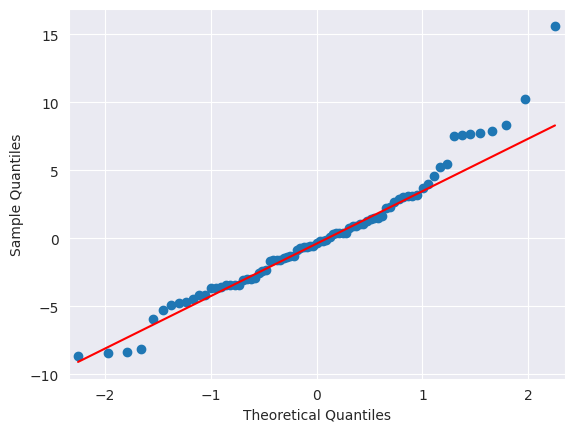

In [15]:
import statsmodels.api as sm
sm.qqplot(model.resid,line='q')
k=1

In [16]:
list(np.where(model.resid>10))

[array([ 0, 76])]

In [17]:
model.resid

0     10.258747
1      7.624608
2      7.734060
3      3.157963
4      8.331584
        ...    
76    15.617904
77     1.298838
78     7.863547
79     7.517122
80    -3.458218
Length: 81, dtype: float64

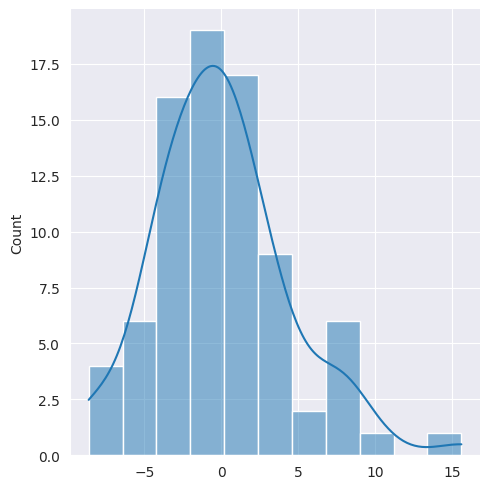

In [18]:
sns.displot(model.resid, kde = True)

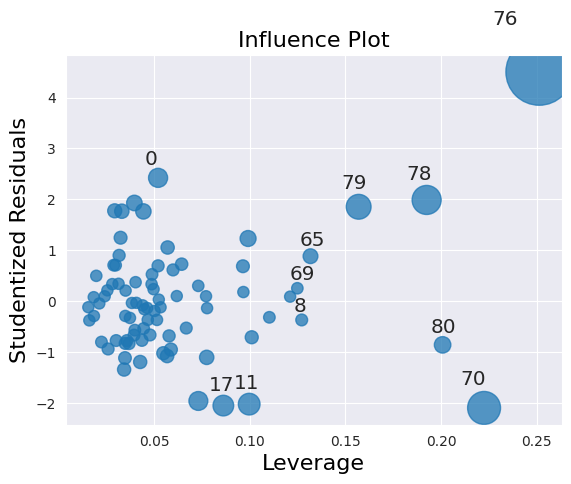

In [19]:
sm.graphics.influence_plot(model)
k=1

## residual Plot for Homoscedasticity

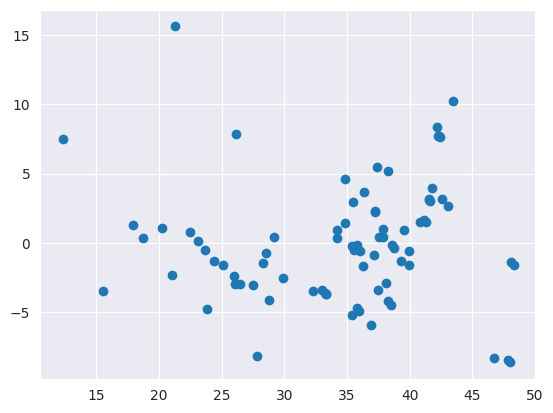

In [20]:
plt.scatter(model.fittedvalues,model.resid)

## residual vs Regressors

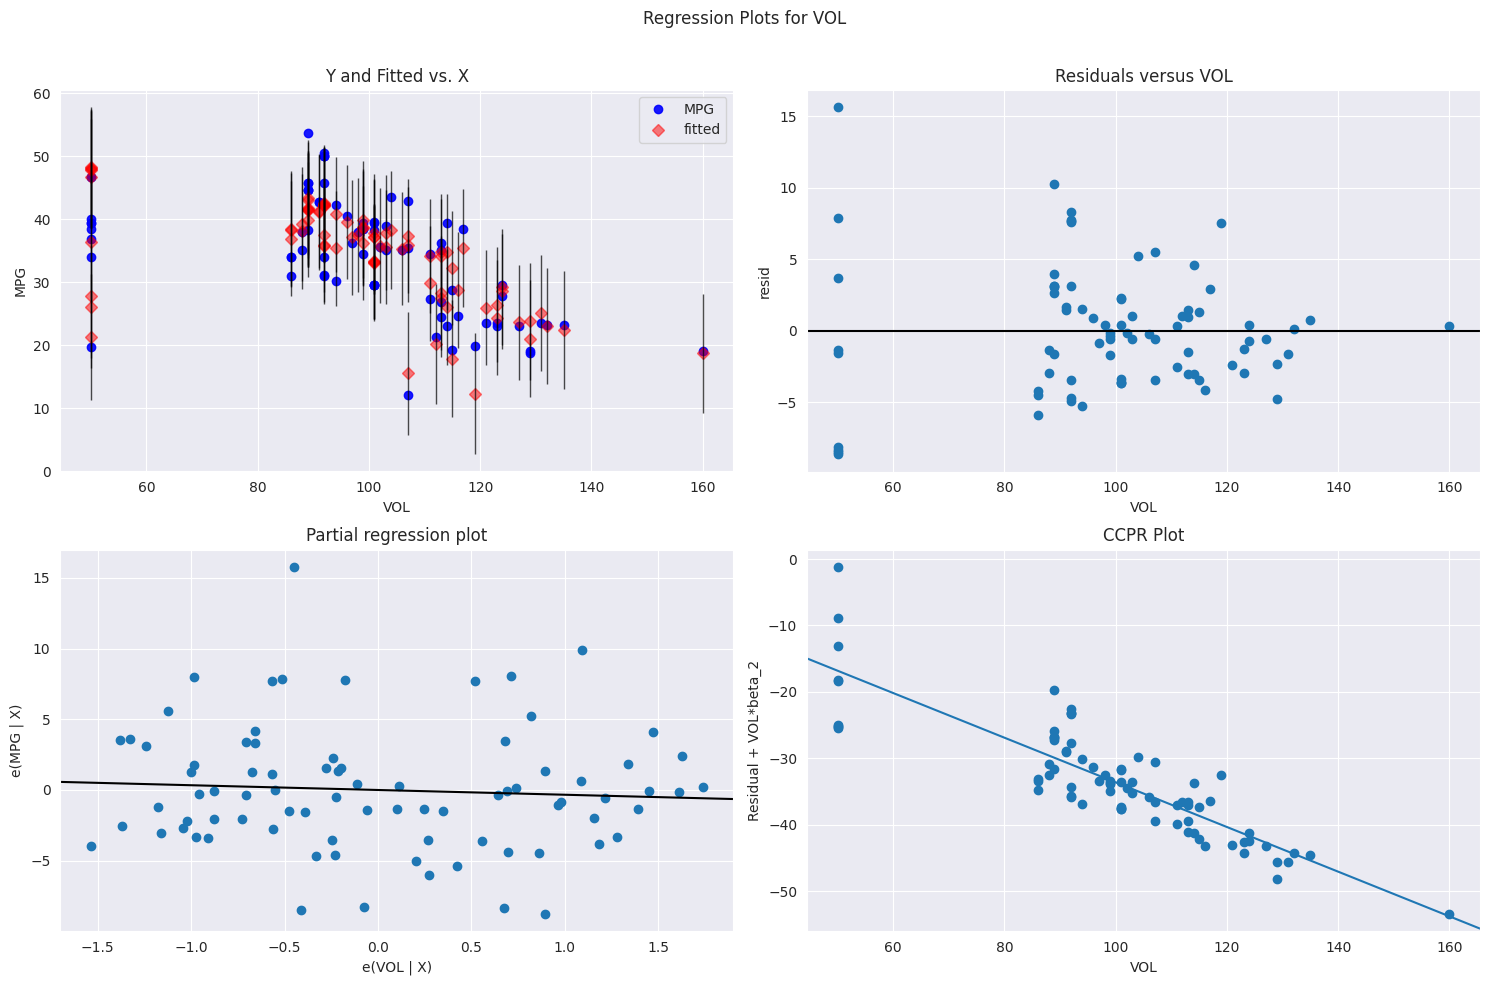

In [21]:
fig = plt.figure(figsize=(15,10))
fig = sm.graphics.plot_regress_exog(model, "VOL", fig=fig)

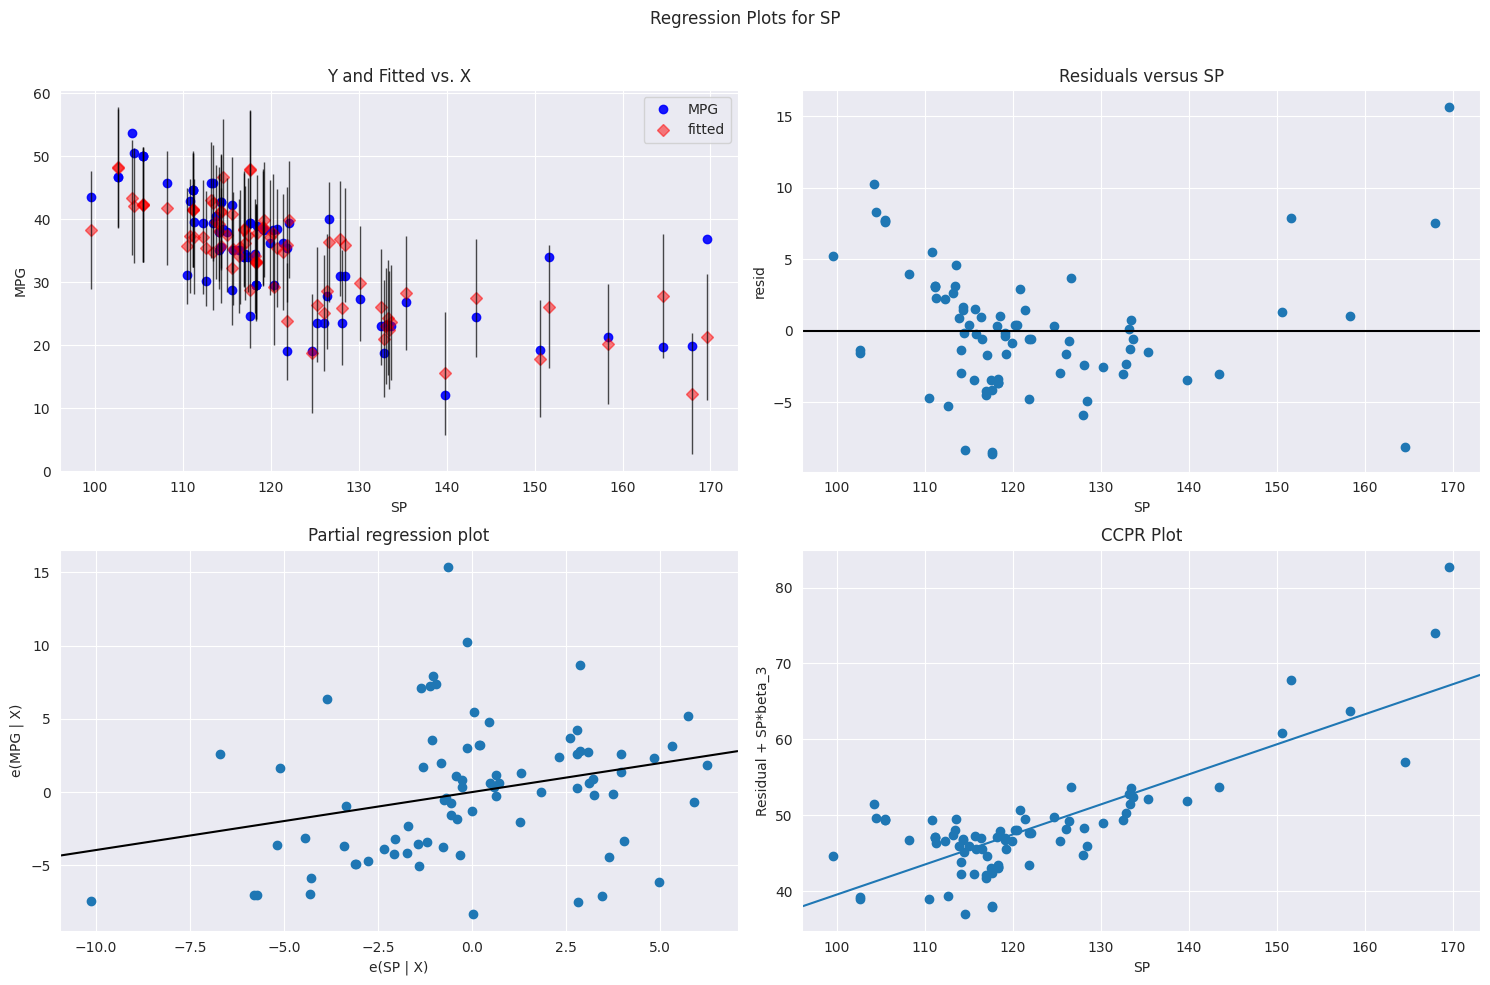

In [22]:
fig = plt.figure(figsize=(15,10))
fig = sm.graphics.plot_regress_exog(model, "SP", fig=fig)

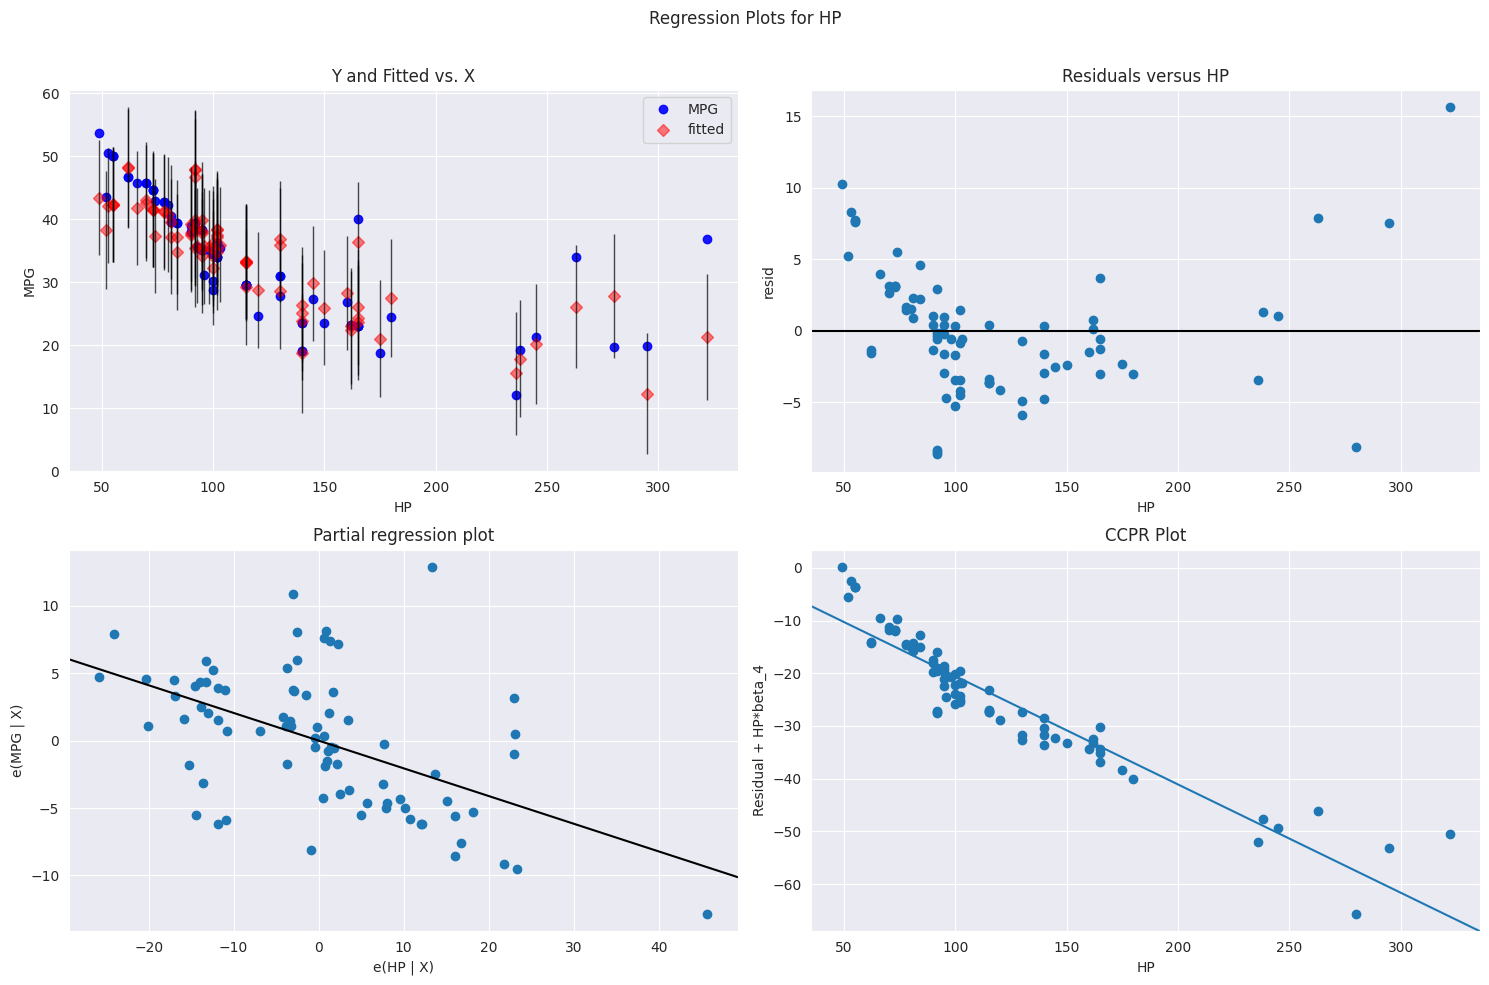

In [23]:
fig = plt.figure(figsize=(15,10))
fig = sm.graphics.plot_regress_exog(model, "HP", fig=fig)

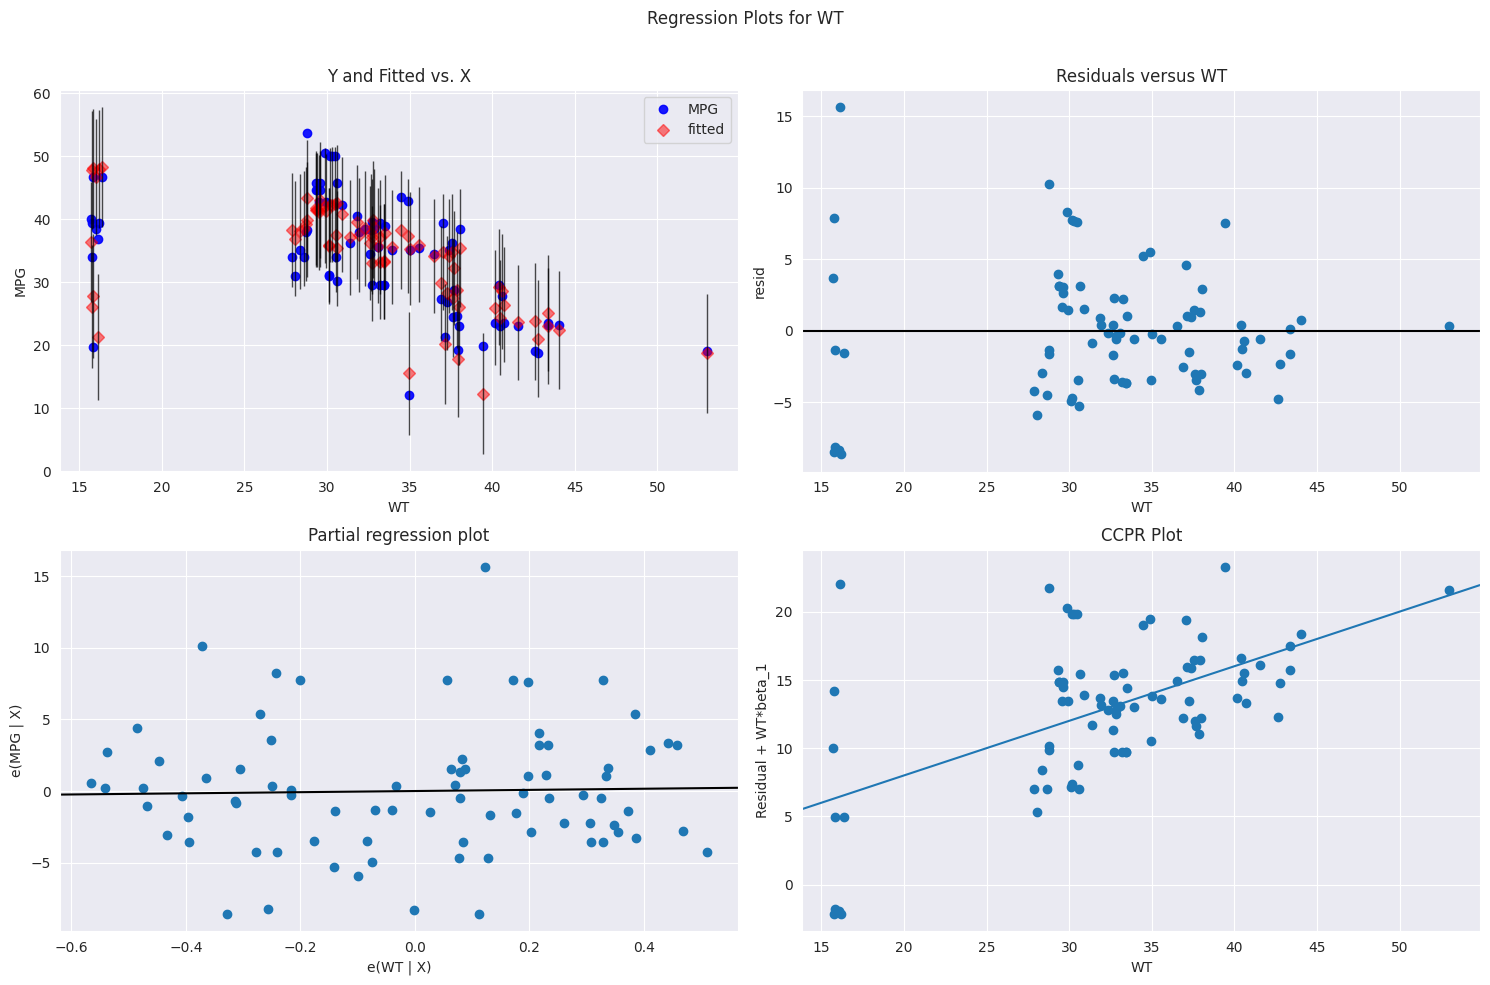

In [24]:
fig = plt.figure(figsize=(15,10))
fig = sm.graphics.plot_regress_exog(model, "WT", fig=fig)

##model deletion dignostics

### cooks distance

In [25]:
(c,_)=model.get_influence().cooks_distance
c

array([6.04797739e-02, 2.80207825e-02, 1.84833331e-02, 7.27752720e-03,
       2.96019879e-02, 4.81278004e-03, 2.07405847e-02, 2.55586700e-03,
       4.05692942e-03, 7.54004910e-04, 2.97311924e-03, 8.72887201e-02,
       3.32487183e-04, 3.06716174e-03, 5.27414633e-03, 5.29293219e-03,
       1.16531605e-03, 7.63273362e-02, 6.47114749e-04, 5.79692771e-04,
       1.13359020e-05, 1.03054091e-02, 1.53244850e-04, 3.10730928e-04,
       1.49488694e-03, 5.85742198e-02, 1.00598054e-02, 6.55605611e-05,
       3.30438001e-02, 1.81295962e-04, 1.33814932e-02, 9.97753151e-04,
       4.02570308e-04, 1.13711936e-03, 2.85608656e-03, 4.41332141e-05,
       3.27632348e-04, 4.70959014e-03, 1.21704644e-02, 8.96948188e-03,
       2.35324656e-04, 9.75839299e-06, 4.49488700e-03, 4.48437031e-03,
       1.02593360e-05, 4.75617324e-04, 2.22586830e-05, 4.66305687e-05,
       1.27051048e-02, 5.33728062e-03, 2.98638028e-03, 5.00671925e-03,
       1.29659561e-04, 1.14393086e-02, 8.61438068e-04, 2.46695414e-04,
      

Text(0, 0.5, 'Cooks Distance')

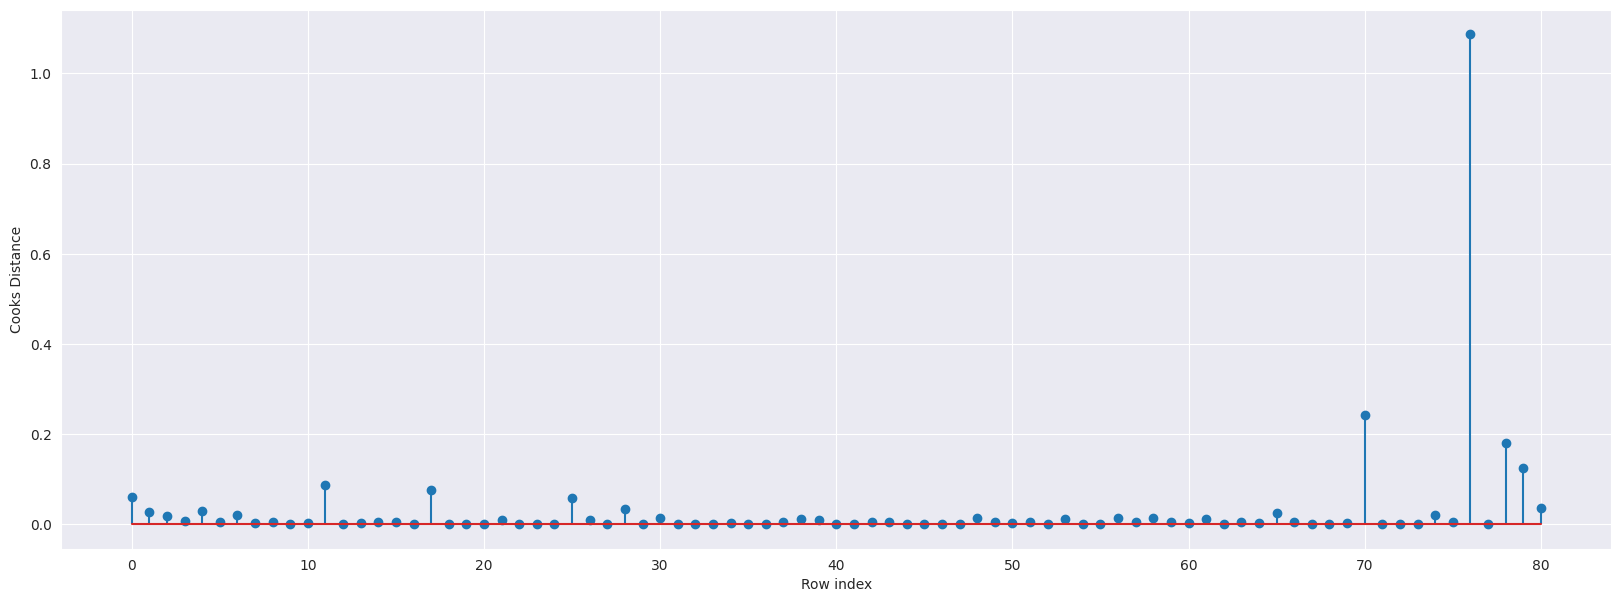

In [26]:
plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(cars)),np.round(c,3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')

In [27]:
np.argmax(c),np.max(c)

(76, 1.0865193998179699)

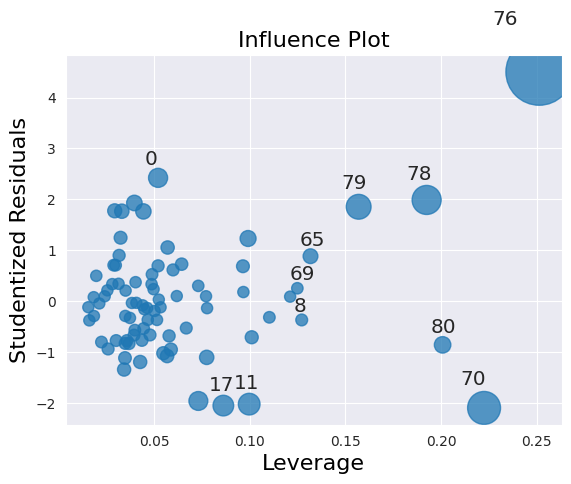

In [28]:
k=influence_plot(model)

In [29]:
k=cars.shape[1] #5
n=cars.shape[0] #81
leverage_cutoff=3*((k+1)/n)
leverage_cutoff

0.2222222222222222

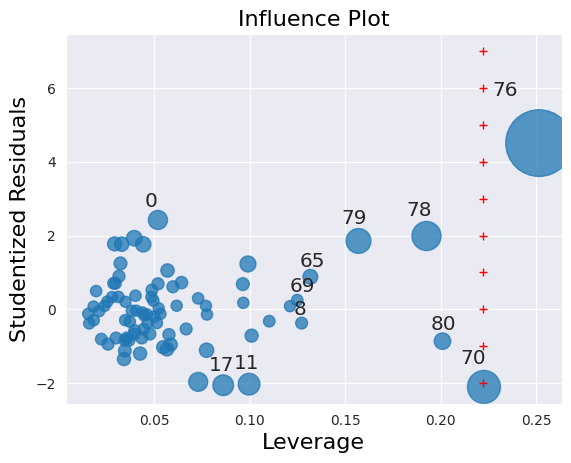

In [30]:
influence_plot(model)

y=[i for i in range(-2,8)]
x=[leverage_cutoff for i in range(10)]
plt.plot(x,y,'r+')

<HTML>

<em color='green'><strong> From the above plot, it is evident that data point 70 and 76 are the influencers</em>

In [31]:
cars[cars.index.isin([70,76])]

,HP,MPG,VOL,SP,WT
70,280,19.678507,50,164.598513,15.823060
76,322,36.900000,50,169.598513,16.132947


In [32]:
cars.head()

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149


## improving the model

In [33]:
#Discard the data points which are influencers and reasign the row number (reset_index())
car1=cars.drop(cars.index[[70,76]],axis=0).reset_index()

In [34]:
car1

,index,HP,MPG,VOL,SP,WT
0,0,49,53.700681,89,104.185353,28.762059
1,1,55,50.013401,92,105.461264,30.466833
2,2,55,50.013401,92,105.461264,30.193597
3,3,70,45.696322,92,113.461264,30.632114
4,4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...,...
74,75,175,18.762837,129,132.864163,42.778219
75,77,238,19.197888,115,150.576579,37.923113
76,78,263,34.000000,50,151.598513,15.769625
77,79,295,19.833733,119,167.944460,39.423099


In [35]:
#Drop the original index
car1=car1.drop(['index'],axis=1)
car1

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
74,175,18.762837,129,132.864163,42.778219
75,238,19.197888,115,150.576579,37.923113
76,263,34.000000,50,151.598513,15.769625
77,295,19.833733,119,167.944460,39.423099


## Build Model with either VOL or WT

In [36]:
final_v=smf.ols('MPG~VOL+SP+HP',data=car1).fit()
(final_v.rsquared,final_v.aic,final_v.bic)

(0.8161692010376008, 446.1172263944772, 455.5950178043453)

In [37]:
final_w=smf.ols('MPG~WT+SP+HP',data=car1).fit()
(final_w.rsquared,final_w.aic,final_w.bic)

(0.8160034320495303, 446.1884323575032, 455.66622376737126)

##### Comparing above R-Square and AIC values, model 'final_V' has high R- square and low AIC value hence include variable 'VOL' so that multi collinearity problem would be resolved.

In [38]:
(cooks,_)=final_v.get_influence().cooks_distance
cooks

array([5.53495774e-02, 2.85062799e-02, 2.85062799e-02, 5.34950005e-03,
       3.55869338e-02, 3.79038996e-03, 2.85062799e-02, 1.32771748e-03,
       1.32771748e-03, 7.56691001e-04, 3.33261259e-03, 1.23339926e-01,
       1.14076048e-03, 3.33261259e-03, 6.21782521e-03, 3.33261259e-03,
       7.09472284e-04, 1.23339926e-01, 7.09472284e-04, 1.25650858e-04,
       1.65511111e-04, 1.01187126e-02, 9.35876569e-06, 1.90597263e-04,
       1.71252801e-03, 9.20677227e-02, 4.07373927e-03, 1.65511111e-04,
       4.16239310e-02, 3.31390188e-04, 6.85632716e-03, 1.32756399e-03,
       3.93747165e-04, 7.49398680e-04, 1.27154771e-03, 6.48751557e-06,
       4.76583309e-04, 4.91748288e-03, 4.91748288e-03, 1.49663702e-02,
       1.43677902e-04, 3.71158078e-05, 2.37724155e-03, 2.97638136e-03,
       6.13773416e-05, 6.29555458e-04, 8.19182717e-08, 1.01290206e-04,
       2.15887173e-02, 3.96459368e-03, 3.96459368e-03, 3.96459368e-03,
       3.11686431e-06, 1.13032165e-02, 9.69905045e-04, 5.96059114e-04,
      

<StemContainer object of 3 artists>

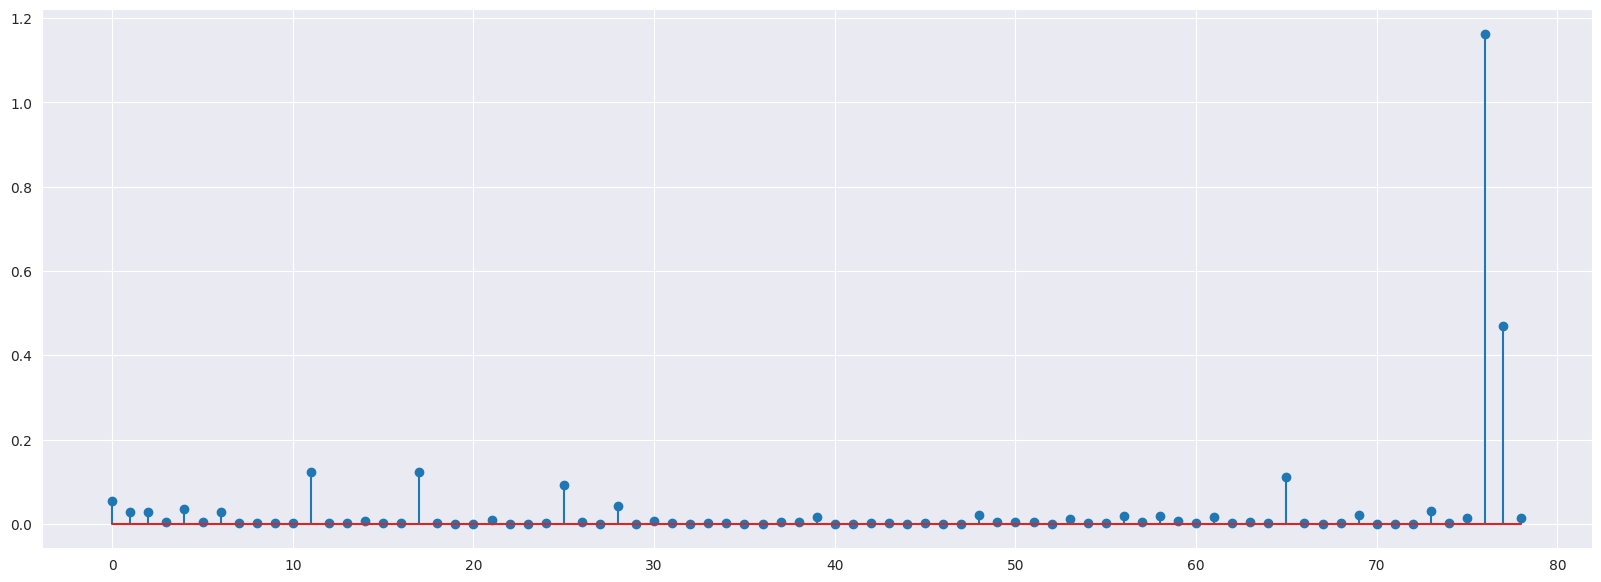

In [39]:
plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(car1)),np.round(cooks,3))

In [40]:
(np.argmax(cooks),np.max(cooks))

(76, 1.1629387469135182)

In [41]:
car2=car1.drop(car1.index[[76,77]],axis=0)
car2

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
72,140,19.086341,160,124.715241,52.997752
73,140,19.086341,129,121.864163,42.618698
74,175,18.762837,129,132.864163,42.778219
75,238,19.197888,115,150.576579,37.923113


In [42]:
car3=car2.reset_index()
car3=car3.drop(['index'],axis=1)
car3

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
72,140,19.086341,160,124.715241,52.997752
73,140,19.086341,129,121.864163,42.618698
74,175,18.762837,129,132.864163,42.778219
75,238,19.197888,115,150.576579,37.923113


#### build a model on new data

In [43]:
final_ml=smf.ols('MPG~VOL+HP+SP',data=car3).fit()

In [44]:
(cd,_)=final_ml.get_influence().cooks_distance
cd

array([6.67624758e-02, 3.14966307e-02, 3.14966307e-02, 4.41723601e-03,
       3.97043587e-02, 3.18490107e-03, 3.14966307e-02, 2.72885950e-05,
       2.72885950e-05, 4.23158478e-04, 3.36657172e-03, 1.11242286e-01,
       2.48821721e-03, 3.36657172e-03, 6.02019366e-03, 3.36657172e-03,
       4.76170508e-04, 1.11242286e-01, 4.76170508e-04, 8.82063701e-08,
       4.85657000e-04, 9.04771072e-03, 1.03596157e-04, 2.90455670e-05,
       1.62817845e-03, 8.44546582e-02, 1.41130179e-03, 4.85657000e-04,
       2.35932141e-02, 7.74080941e-04, 5.13295810e-03, 8.85600593e-04,
       3.71445242e-04, 3.34592443e-04, 6.55775719e-04, 6.50001470e-06,
       5.18707563e-04, 5.17386941e-03, 5.17386941e-03, 1.14762595e-02,
       1.77539300e-05, 2.94570648e-04, 2.60372905e-03, 3.42589309e-03,
       2.95070478e-04, 8.57428219e-04, 1.22100386e-04, 2.68649147e-04,
       1.72755037e-02, 4.28555597e-03, 4.28555597e-03, 4.28555597e-03,
       3.62914824e-04, 7.40875771e-05, 2.07146665e-04, 9.39876467e-04,
      

<StemContainer object of 3 artists>

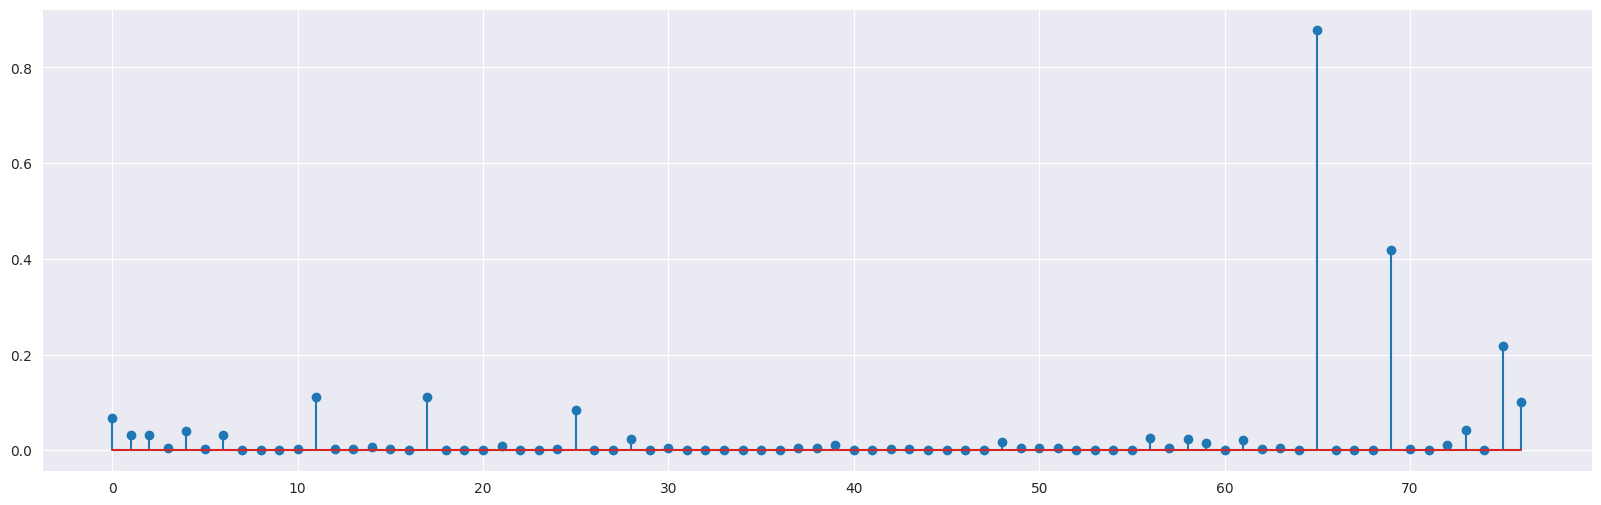

In [45]:
plt.subplots(figsize=(20,6))
plt.stem(np.arange(len(car3)),cd)

In [46]:
(np.argmax(cd),np.max(cd))

(65, 0.8774556986296758)

#### Since the value is <1 , we can stop the diagnostic process and finalize the model

In [47]:
(final_ml.rsquared,final_ml.aic)

(0.8669636111859063, 409.4153062719508)

## predict for new data

In [48]:
#New data for prediction
new_data=pd.DataFrame({'HP':40,"VOL":95,"SP":102,},index=[1])

In [49]:
new_data

,HP,VOL,SP
1,40,95,102


In [50]:
final_ml.predict(new_data)

1    46.035594
dtype: float64

In [51]:
newcars=cars[['HP','VOL','SP']]
newcars.head()

,HP,VOL,SP
0,49,89,104.185353
1,55,92,105.461264
2,55,92,105.461264
3,70,92,113.461264
4,53,92,104.461264


In [52]:
newcars['mpg']=final_ml.predict(newcars)
newcars.head()

,HP,VOL,SP,mpg
0,49,89,104.185353,45.428872
1,55,92,105.461264,43.992392
2,55,92,105.461264,43.992392
3,70,92,113.461264,43.508150
4,53,92,104.461264,44.085858


In [53]:
car3.head()

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149


In [54]:
# Estimation of mean squared error
from sklearn.metrics import mean_squared_error

In [55]:
mean_squared_error(car3["MPG"], final_ml.fittedvalues)

10.754332851589762